<center><h1>Exploratory Data Analysis for Taxi Trip Duration Project</h1></center>
In this project, we will perform EDA on the taxi trip duration dataset in order to generate insights from it for subsequent machine learning.

## Reading Files into Python##

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv('nyc_taxi/nyc_taxi_trip_duration.csv')

In [3]:
# to view the data, we can use the head command
# head(n = "enter the number of rows to want to view from top")

data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


---

***`DATA DESCRIPTION`***
- ***id*** - a unique identifier for each trip
- ***vendor_id*** - a code indicating the provider associated with the trip record
- ***pickup_datetime*** - date and time when the meter was engaged
- ***dropoff_datetime*** - date and time when the meter was disengaged
- ***passenger_count*** - the number of passengers in the vehicle (driver entered value)
- ***pickup_longitude*** - the longitude where the meter was engaged
- ***pickup_latitude*** - the latitude where the meter was engaged
- ***dropoff_longitude*** - the longitude where the meter was disengaged
- ***dropoff_latitude*** - the latitude where the meter was disengaged
- ***store_and_fwd_flag*** - This flag indicates whether the trip record was held in-vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- ***trip_duration*** - (target) duration of the trip in seconds

In [4]:
# to check the dimension of the data set, we can use the shape 
data.shape

(729322, 11)

In [5]:
#last 5 instances using "tail()" function
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
data['id'].str[2:]

0         1080784
1         0889885
2         0857912
3         3744273
4         0232939
           ...   
729317    3905982
729318    0102861
729319    0439699
729320    2078912
729321    1053441
Name: id, Length: 729322, dtype: object

In [7]:
#Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


## Variable Identification and Typecasting

### Integer Data Type

In [9]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

Summary:

*    **vendor_id** is a unique number assigned to vendors. It should be left as **Integer**.

*    **passenger_count** is the number of passengers, therefore it should be left as **Integer**.

*    **trip_duration** is also **Integer**.


### Float Data Type

In [10]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

### Object Data Type

In [11]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [12]:
# Manually checking object types
data[['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']].head(7)

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
0,id1080784,2016-02-29 16:40:21,2016-02-29 16:47:01,N
1,id0889885,2016-03-11 23:35:37,2016-03-11 23:53:57,N
2,id0857912,2016-02-21 17:59:33,2016-02-21 18:26:48,N
3,id3744273,2016-01-05 09:44:31,2016-01-05 10:03:32,N
4,id0232939,2016-02-17 06:42:23,2016-02-17 06:56:31,N
5,id1918069,2016-02-14 18:31:42,2016-02-14 18:55:57,N
6,id2429028,2016-04-20 20:30:14,2016-04-20 20:36:51,N


In [13]:
# typecasting "store_and_fwd_flag" to category type 
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')
data['id'] = data['vendor_id'].astype('int64')
# checking
data[['store_and_fwd_flag']].dtypes
data[['vendor_id']].dtypes
data[['id']].dtypes

id    int64
dtype: object

### datetime Data Type

In [14]:
# creating two instances (pickup_date and dropoff_date) of DatetimeIndex class using "pickup_datetime" and "dropoff_datetime"
pickup_date = pd.DatetimeIndex(data['pickup_datetime'])
dropoff_date = pd.DatetimeIndex(data['dropoff_datetime'])

In [15]:
# extracting new columns from "pickup_date" and "dropoff_date"

# last day of year for pickup and dropoff
data['doy_pickup'] = pickup_date.dayofyear
data['doy_dropoff'] = dropoff_date.dayofyear

# week of year for pickup and dropoff
data['woy_pickup'] = pickup_date.weekofyear
data['woy_dropoff'] = dropoff_date.weekofyear

# day of week for pickup and dropoff
data['dow_pickup'] = pickup_date.dayofweek
data['dow_dropoff'] = dropoff_date.dayofweek

# month of year for pickup and dropoff
data['moy_pickup'] = pickup_date.month
data['moy_dropoff'] = dropoff_date.month

# hour of day for pickup and dropoff
data['hod_pickup'] = pickup_date.hour
data['hod_dropoff'] = dropoff_date.hour

# minute of day for pickup and dropoff
data['mod_pickup'] = pickup_date.minute
data['mod_dropoff'] = dropoff_date.minute

# second of day for pickup and dropoff
data['sod_pickup'] = pickup_date.second
data['sod_dropoff'] = dropoff_date.second


In [16]:
# checking new extracted columns using datetime
data[['pickup_datetime','dropoff_datetime','doy_pickup','doy_dropoff','woy_pickup','woy_dropoff','moy_pickup','moy_dropoff','dow_pickup','dow_dropoff','hod_pickup','hod_dropoff','mod_pickup','mod_dropoff','sod_pickup','sod_dropoff']].head()

,pickup_datetime,dropoff_datetime,doy_pickup,doy_dropoff,woy_pickup,woy_dropoff,moy_pickup,moy_dropoff,dow_pickup,dow_dropoff,hod_pickup,hod_dropoff,mod_pickup,mod_dropoff,sod_pickup,sod_dropoff
0,2016-02-29 16:40:21,2016-02-29 16:47:01,60,60,9,9,2,2,0,0,16,16,40,47,21,1
1,2016-03-11 23:35:37,2016-03-11 23:53:57,71,71,10,10,3,3,4,4,23,23,35,53,37,57
2,2016-02-21 17:59:33,2016-02-21 18:26:48,52,52,7,7,2,2,6,6,17,18,59,26,33,48
3,2016-01-05 09:44:31,2016-01-05 10:03:32,5,5,1,1,1,1,1,1,9,10,44,3,31,32
4,2016-02-17 06:42:23,2016-02-17 06:56:31,48,48,7,7,2,2,2,2,6,6,42,56,23,31


---

***`DATA FOR NEW GENERATED COLUMNS`***
- ***doy_pickup*** - day of the year of pickup
- ***doy_dropoff*** - day of year of dropoff
- ***woy_pickup*** - week of year of pickup
- ***woy_dropoff*** - week of year of dropoff
- ***moy_pickup*** - month of year of pickup
- ***moy_dropoff*** - month of year of dropoff
- ***dow_dropoff*** - day of week of dropoff
- ***dow_pickup*** - day of week of pickup
- ***hod_pickup*** - hour of day of pickup
- ***hod_dropoff*** - hour of day of dropoff
- ***mod_dropoff*** - minute of day of dropoff
- ***mod_pickup*** - minute of day of pickup
- ***sod_dropoff*** - second of day of dropoff
- ***sod_pickup*** - second of day of pickup


In [19]:
#data = data.drop(columns = ['pickup_datetime','dropoff_datetime'])
data.dtypes

id                       int64
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
doy_pickup               int64
doy_dropoff              int64
woy_pickup               int64
woy_dropoff              int64
dow_pickup               int64
dow_dropoff              int64
moy_pickup               int64
moy_dropoff              int64
hod_pickup               int64
hod_dropoff              int64
mod_pickup               int64
mod_dropoff              int64
sod_pickup               int64
sod_dropoff              int64
dtype: object

pickup_datetime and dropoff_datetime have bee dropped using data = data.drop(columns = ['pickup_datetime','dropoff_datetime'])

**For the newly created columns**, we need to change the types to the appropriate datatypes.

In [46]:
data['dow_pickup'] = data['dow_pickup'].astype('category')
data['dow_dropoff'] = data['dow_dropoff'].astype('category')
data['moy_pickup'] = data['moy_pickup'].astype('category')
data['moy_dropoff'] = data['moy_dropoff'].astype('category')

In [47]:
data.dtypes

id                       int64
vendor_id             category
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
doy_pickup               int64
doy_dropoff              int64
woy_pickup               int64
woy_dropoff              int64
dow_pickup            category
dow_dropoff           category
moy_pickup            category
moy_dropoff           category
hod_pickup               int64
hod_dropoff              int64
mod_pickup               int64
mod_dropoff              int64
sod_pickup               int64
sod_dropoff              int64
dtype: object

## Univariate Analysis: Numerical Variables

In [48]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

id                     int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
doy_pickup             int64
doy_dropoff            int64
woy_pickup             int64
woy_dropoff            int64
hod_pickup             int64
hod_dropoff            int64
mod_pickup             int64
mod_dropoff            int64
sod_pickup             int64
sod_dropoff            int64
dtype: object

In [49]:
# seggregating variables into groups
taxi_details = ['id','trip_duration']
longitude = ['pickup_longitude', 'dropoff_longitude']
latitude = ['pickup_latitude','dropoff_latitude']
pickup_date = ['doy_pickup','woy_pickup']
dropoff_date = ['doy_dropoff','woy_dropoff']
pickup_time = ['hod_pickup','mod_pickup','sod_pickup']
dropoff_time = ['hod_dropoff','mod_dropoff','sod_dropoff']

In [50]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### taxi_details

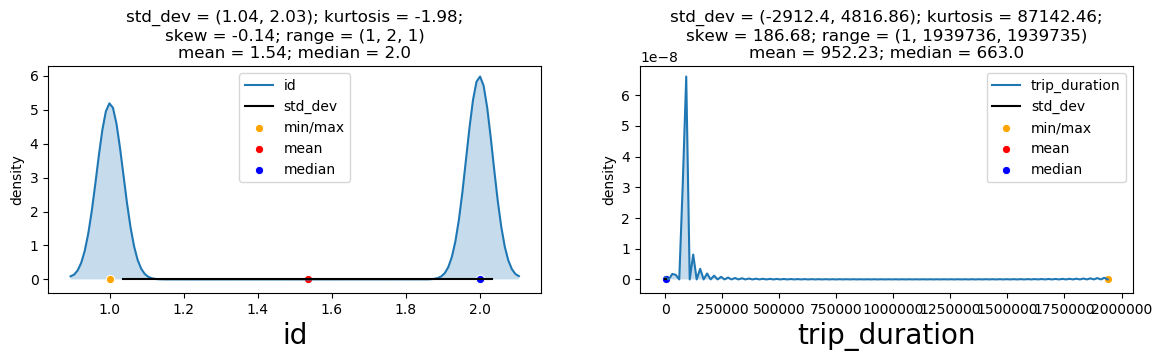

In [29]:
UVA_numeric(data,taxi_details)

**Summary of Taxi Details**
*    **id**:
     *    variable is **unique for every taxi, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **trip_duration**:
    *    Median duration = 663 seconds
    *    **The trip duration range from -2912.4 to 4816.86**. The negative value in the standard deviation indicates the presence of errors in the dataset, as trip duration can only be positive.
    *    skewness +186.68: This indicates that more trip durations were above the median value of 663.0 seconds, since skewness = mode < median < mean
    *    **kurtosis = 87142.46**; Indicates the presence of many outlier values.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

**Summary**
*    Considering the kurtosis and skewness value  for the plots. Outliers/Extreme values are imminent.
Therefore, we will remove the outlier values and visualize them again.

In [53]:
# standard deviation factor
factor = 3

# copying taxi details
cm_data = data[taxi_details]

# filtering using standard deviation (not considering observations > 3*standard deviation)
cm_data = cm_data[cm_data['trip_duration'] < factor*cm_data['trip_duration'].std()]


# checking how many points removed
len(data), len(cm_data)


(729322, 728295)

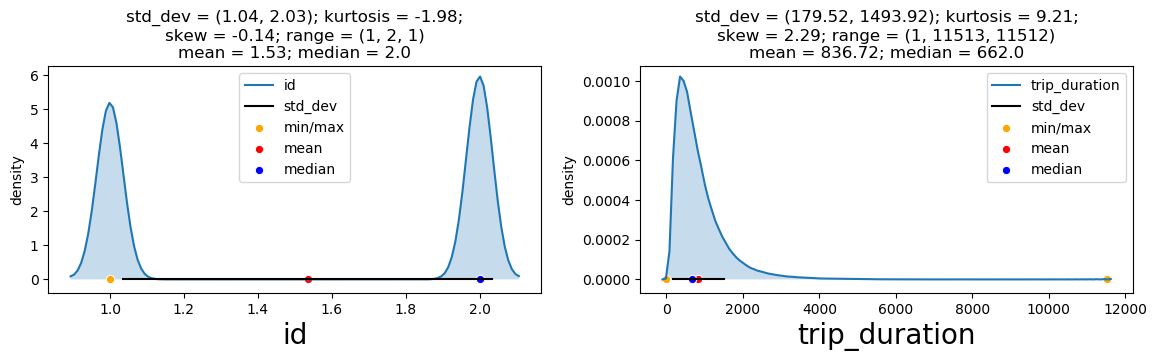

In [54]:
UVA_numeric(cm_data,taxi_details)

**Summary**

After removing the outliers, the plots are still very skewed.

### longitude

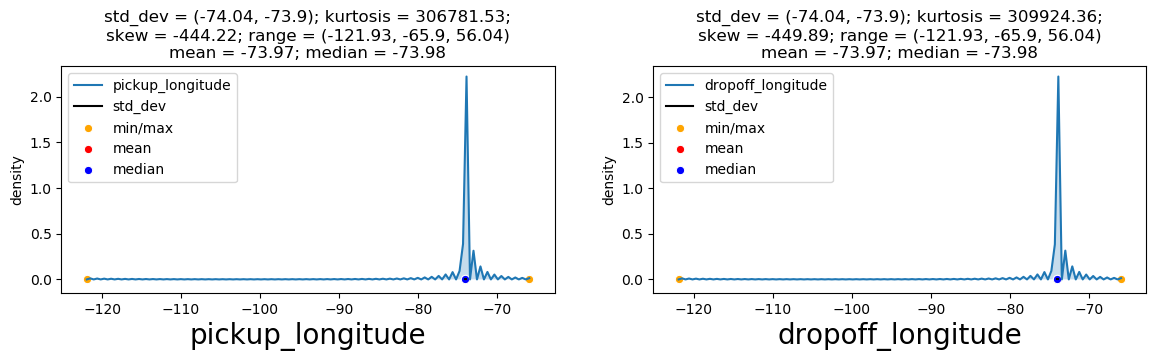

In [52]:
UVA_numeric(data,longitude)

This is a unique value for the location. Hece, we cannot change it.

### latitude

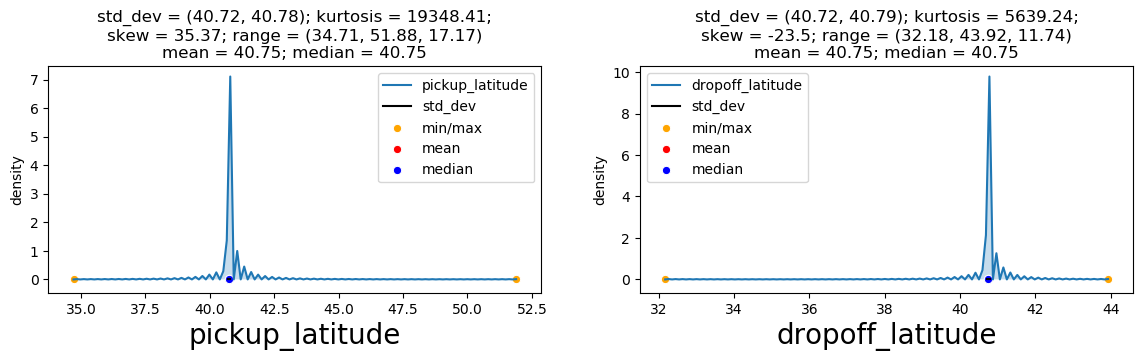

In [56]:
UVA_numeric(data,latitude)

### pickup_date

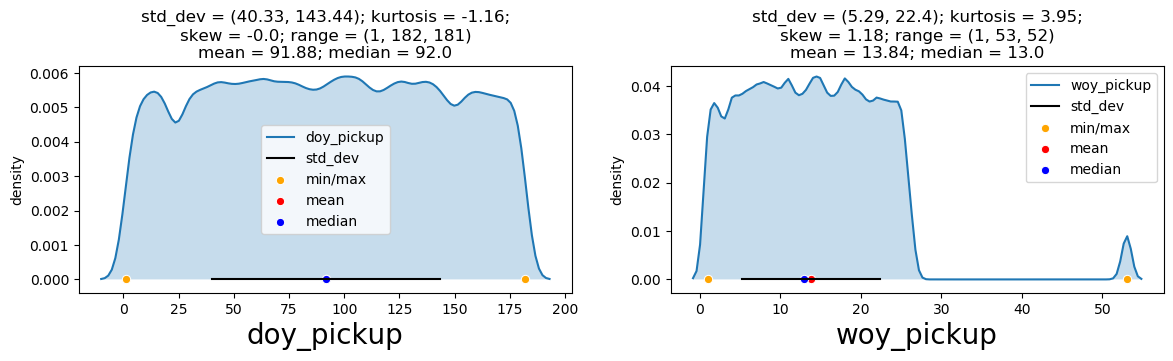

In [55]:
UVA_numeric(data,pickup_date)

**Summary**

**doy_pickup**
* The days of the year that the meter was engaged was from Day 1 to Day 182. What happened to the other days?
* There are some dips in the figure, indicating that there were some days that the meter was engaged less frequently.
* Skewness: -0.0; indicating an almost normal distribution. More meters were engaged before 92 days.
    
**woy_pickup**
* More pickups occurred between the first and 28th weeks of the year.
* There were no activity between the 29th week and the 50th week.
* Some activities also occurred during the 52nd week.


The latitude has the same distribution as the longitude. Hence we cannot change it.

### dropoff_date

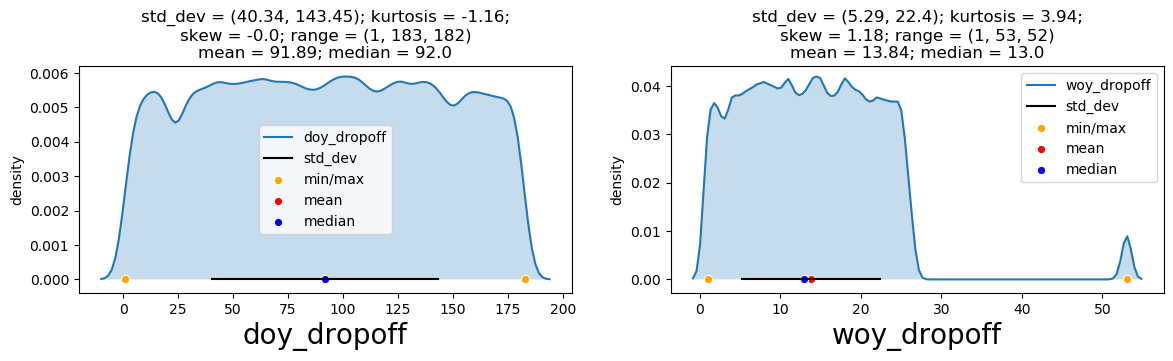

In [58]:
UVA_numeric(data,dropoff_date)

**Summary**

Both variables have the same distribution as that of the pickup.


### pickup_time

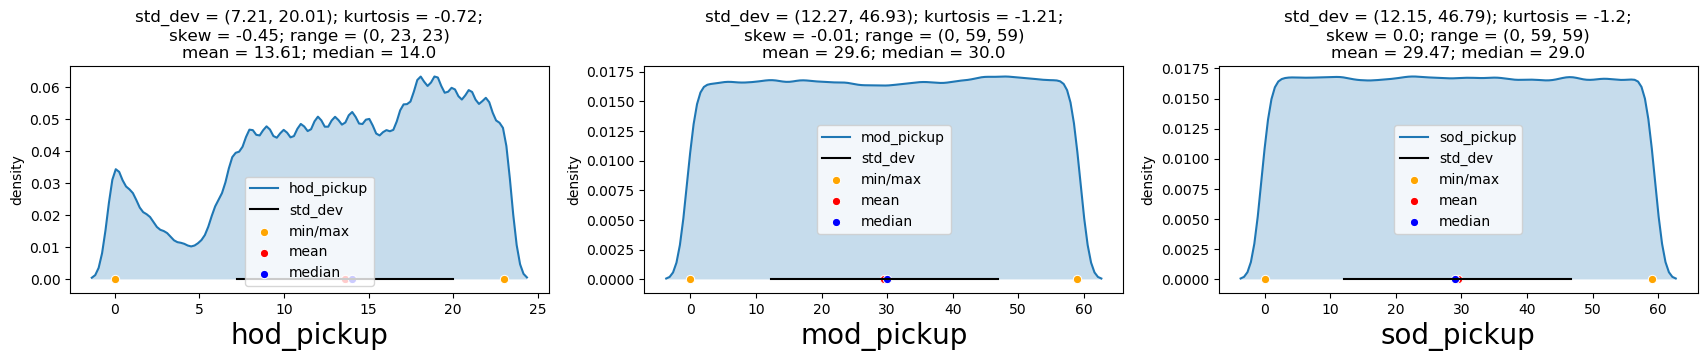

In [60]:
UVA_numeric(data,pickup_time)

**Summary**

**hod_pickup**
* Based on the standard deviation, more meters were engaged between 7:00 and 20:00 hours.
* Some meters were engaged in the midnight, i.e. 00:00 hours.

**mod_pickup** and **sod_pickup**
* Both have normal distributions.

**Things to investigate**

* Which period of the day has the shortest trip duration?

### dropoff_time

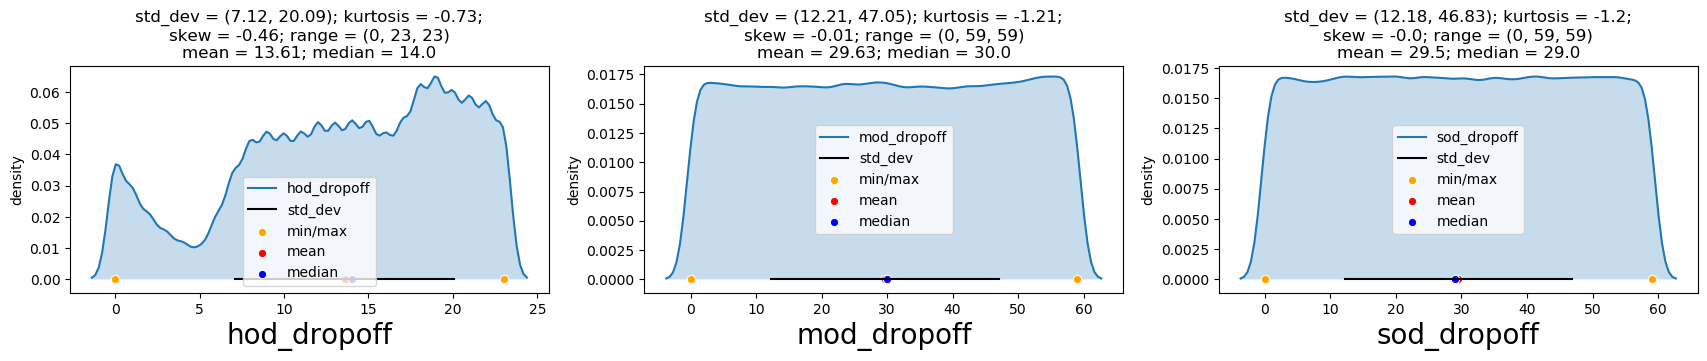

In [61]:
UVA_numeric(data,dropoff_time)

**Summary**

All the distributions are similar to that of the pickup.

## Univariate Analysis: Categorical Variables

In [62]:
data.select_dtypes(include=['category']).dtypes

vendor_id             category
store_and_fwd_flag    category
dow_pickup            category
dow_dropoff           category
moy_pickup            category
moy_dropoff           category
dtype: object

In [68]:
# seggregating some variables into groups
day_of_week = ['dow_pickup','dow_dropoff']
month_of_year = ['moy_pickup','moy_dropoff']
vendor_id = ['vendor_id']
store_and_fwd_flag = ['store_and_fwd_flag']

In [64]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### vendor_id

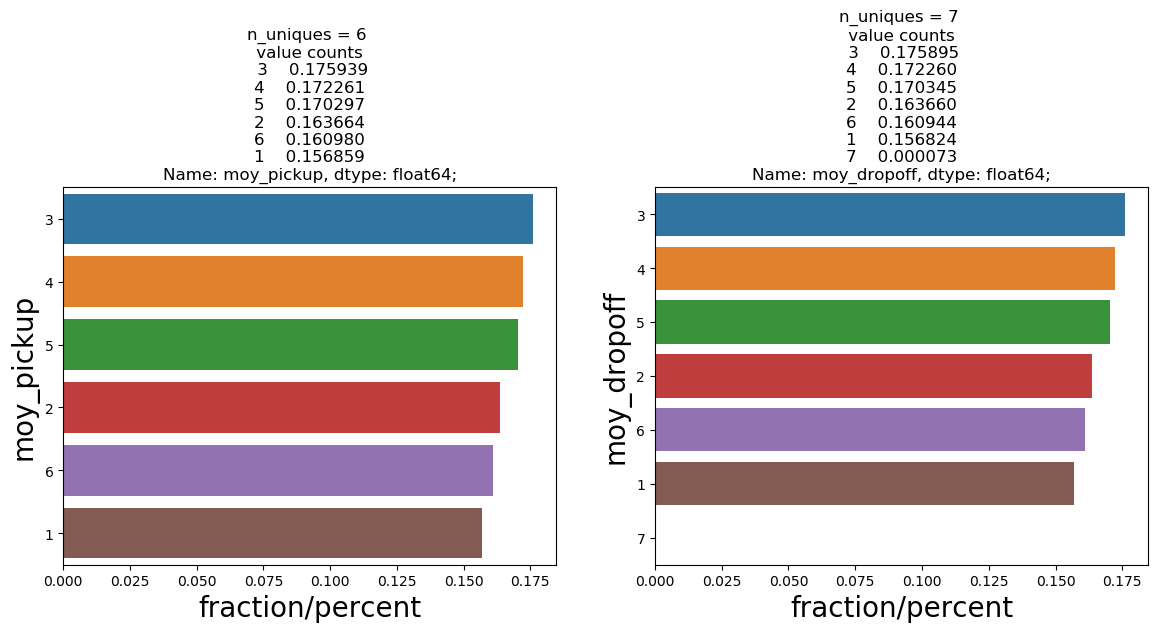

In [67]:
UVA_category(data, month_of_year)

***Summary***

**moy_pickup**
* The meter was engaged in only 6 out of 12 months.
* March had the highest engagement.
* January had the least engagement.

**moy_dropoff**
* As with moy_pickup, March had the highest meter disengagement.
* There were extremely low dropoff values in the seventh month. May explain outliers. This was not observed for the moy_pickup.

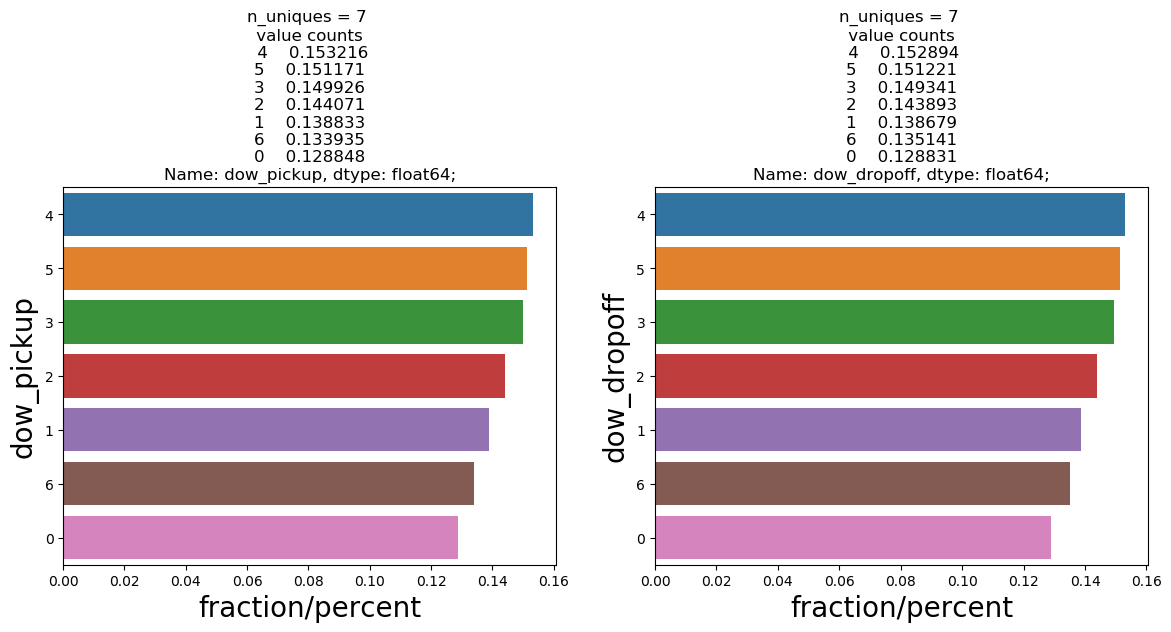

In [70]:
UVA_category(data, day_of_week)

**Summary**

For both variables, Friday had the highest activity while Monday had the least activity.

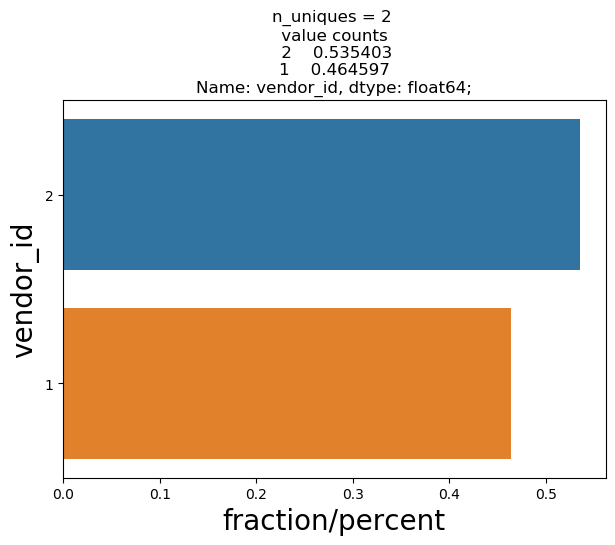

In [71]:
UVA_category(data, vendor_id)

**Summary**
* Vendor id 2 is more than vendor id 1. 

**Things to investigate**
* Which vendor id has the shortest trip duration?

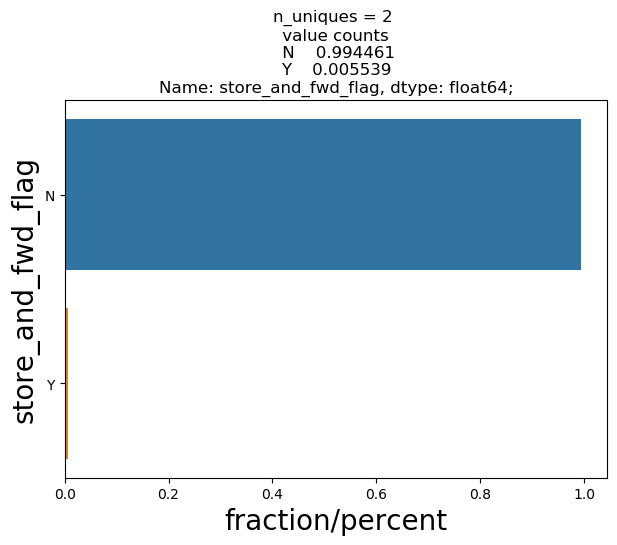

In [72]:
UVA_category(data, store_and_fwd_flag)

**Summary**

* Few trips stored the tri records because of lack of connection to the server of the provider.

**Things to investigate**

* Does high number of store and forward flag lead to longer trip duration?
* If so, which vendor id has the highest number of store and forward flags?

### Univariate Analysis: Missing Values

In [77]:
# finding number of missing values in every variable
data.isnull().sum()

id                    0
vendor_id             0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
doy_pickup            0
doy_dropoff           0
woy_pickup            0
woy_dropoff           0
dow_pickup            0
dow_dropoff           0
moy_pickup            0
moy_dropoff           0
hod_pickup            0
hod_dropoff           0
mod_pickup            0
mod_dropoff           0
sod_pickup            0
sod_dropoff           0
dtype: int64

**Summary**

There are no missing values in the dataset.

### Univariate Analysis: Outliers

In [78]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


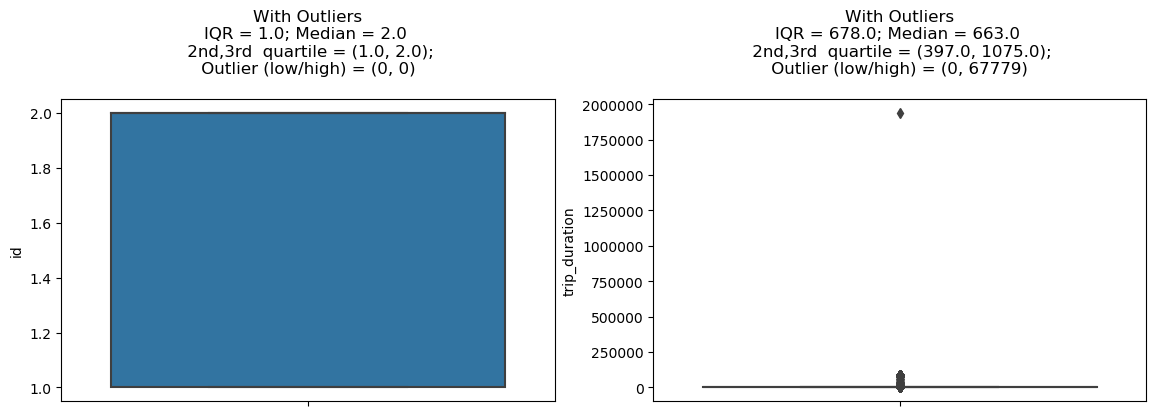

In [79]:
UVA_outlier(data, taxi_details,)

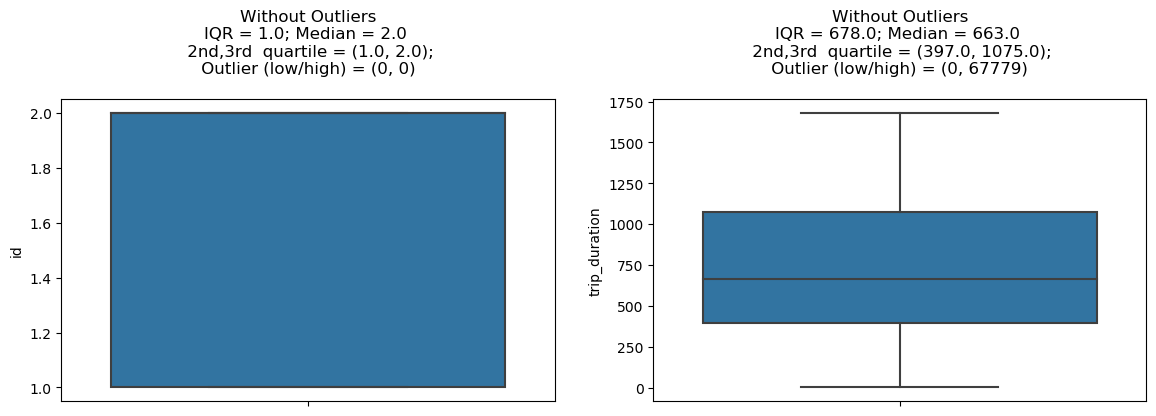

In [80]:
UVA_outlier(data, taxi_details, include_outlier=False)

### Investigation Directions from Univariate Analysis

* Does high number of store and forward flag lead to longer trip duration?
* If so, which vendor id has the highest number of store and forward flags?
* Which vendor id has the shortest trip duration?
